In [8]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [3]:
nino3nc = nc.Dataset('Amon_IPSL-CM5A-LR_past1000_r1i1p1_0865_1835_anom_strong1_nino3_jjas_ymean.nc')
hcnc = nc.Dataset('Amon_IPSL-CM5A-LR_past1000_r1i1p1_0865_1835_anom_strong1_ci1_jjas_ymean.nc')
tas = nino3nc.variables['tas'][:]
va = hcnc.variables['va'][:]

In [53]:
# Computation of hadley circulation index which is a very good precursor of Indian Monsoon
# Choosing the same in model simulation as precipitation is a derived field and 
# has uncertainty specially over tropics whereas winds in the model simulations have high confidence 

# https://rmets.onlinelibrary.wiley.com/doi/epdf/10.1002/qj.49712555412
imhc = va[:,2,:,:] - va[:,8,:,:]

In [39]:
nino3 = tas.mean(axis=(1, 2))
im = imhc.mean(axis=(1, 2))

nino3_norm = (nino3 - np.mean(nino3))/(np.std(nino3))
im_norm = (im - np.mean(im))/(np.std(im))

years = np.arange(12)

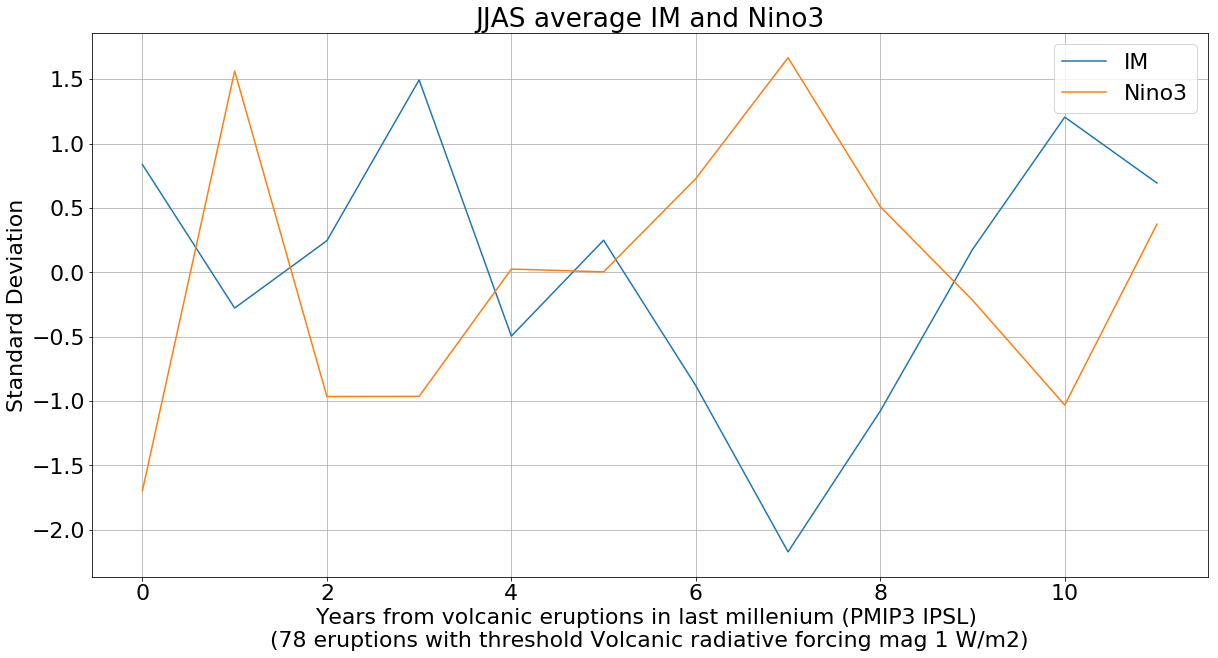

In [71]:
plt.figure(figsize=(20, 10))
plt.plot(years, im_norm, label='IM')
plt.plot(years, nino3_norm, label='Nino3')
plt.legend(fontsize=22)
plt.grid()
plt.rcParams.update({'font.size': 22})
plt.xlabel('Years from volcanic eruptions in last millenium (PMIP3 IPSL) \n(78 eruptions with threshold Volcanic radiative forcing mag 1 W/m2)')
plt.ylabel('Standard Deviation')
plt.title('JJAS average IM and Nino3')
plt.savefig('im_nino3_10y_post_eruption.pdf')

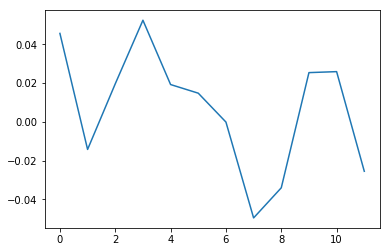

In [41]:
# Checked with the ferret plot, k=17 in ferret which is 1000 hPa 
# is k=0 in python
plt.plot(years, va[:,0,:,:].mean(axis=(1, 2)))

In [54]:
# Calculation of correlation coefficients

In [55]:
np.corrcoef(im_norm, nino3_norm)

array([[ 1.        , -0.78135336],
       [-0.78135336,  1.        ]])

In [59]:
imhc_lmnc = nc.Dataset('va_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0865_1835_anom_ci1_jjas_ymean.nc')
tas_lmnc = nc.Dataset('tas_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0865_1835_anom_nino3_jjas_ymean.nc')

In [60]:
tas_lm = tas_lmnc.variables['tas'][:]
va_lm = imhc_lmnc.variables['va'][:]

In [69]:
nino3_lm = tas_lm.mean(axis=(1, 2))
imhc_lm = va_lm[:,2,:,:].mean(axis=(1, 2)) - va_lm[:,8,:,:].mean(axis=(1, 2))

np.corrcoef(nino3_lm, imhc_lm)

array([[ 1.        , -0.66521206],
       [-0.66521206,  1.        ]])

In [70]:
# Enhancement in the correlation in 10 years post volcanic eruption
print((0.78135336-0.66521206)/0.66521206)

0.17459289598568012
